In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train.ndim # this denotes it`s a 2D array

2

In [ ]:
y_train = y_train.reshape(-1,) # convert to 1d
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_train.ndim # now it has become 1d

1

In [ ]:
y_test = y_test.reshape(-1,) # re-shape the y axis as well

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


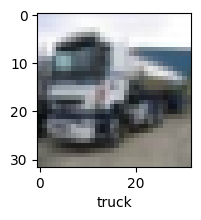

In [ ]:
plot_sample(X_train, y_train, 225)

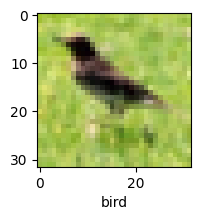

In [ ]:
plot_sample(X_train, y_train, 45021)

In [ ]:

# normalize training data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# simple ANN - accuracy is low compared to CNN
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes to be outputed
        ])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.8120 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.6240 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.5416 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4823 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 134s 85ms/step - loss: 1.4319 - accuracy: 0.4938


In [ ]:
# derive a clasification report for the 10 classes
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 26ms/step
Classification Report:               precision    recall  f1-score   support

           0       0.42      0.71      0.53      1000
           1       0.61      0.61      0.61      1000
           2       0.37      0.28      0.32      1000
           3       0.35      0.28      0.31      1000
           4       0.48      0.24      0.32      1000
           5       0.40      0.35      0.37      1000
           6       0.34      0.84      0.48      1000
           7       0.75      0.35      0.48      1000
           8       0.73      0.46      0.56      1000
           9       0.62      0.50      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [ ]:
# define high accurate CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [ ]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 35ms/step - loss: 1.4396 - accuracy: 0.4842
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0972 - accuracy: 0.6164
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9754 - accuracy: 0.6620
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8895 - accuracy: 0.6915
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8261 - accuracy: 0.7148
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7669 - accuracy: 0.7318
Epoch 7/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7160 - accuracy: 0.7525
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6716 - accuracy: 0.7654
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6251 - accuracy: 0.7820
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9562 - accuracy: 0.6918


[0.9562211632728577, 0.6917999982833862]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 7s 23ms/step


array([[2.68910523e-03, 7.48206454e-04, 2.21462473e-02, 7.04739869e-01,
        3.74599302e-04, 2.56964117e-01, 3.44234356e-03, 3.10387441e-05,
        8.68433900e-03, 1.80134681e-04],
       [2.11428287e-05, 1.97470933e-01, 3.92634865e-06, 1.08015673e-10,
        1.79684694e-08, 9.93304328e-11, 1.77616099e-11, 2.03281628e-11,
        8.02463412e-01, 4.05622814e-05],
       [4.56380963e-01, 8.15618485e-02, 3.98353999e-03, 2.20674236e-04,
        9.73937195e-03, 2.11004444e-04, 2.37160612e-06, 1.29073334e-03,
        4.38032538e-01, 8.57693329e-03],
       [9.88183677e-01, 3.07465019e-03, 3.12141655e-03, 1.66740701e-05,
        1.38568832e-03, 9.28637405e-07, 1.39159920e-06, 6.77054868e-06,
        4.18477738e-03, 2.41215621e-05],
       [3.72931652e-07, 8.86740418e-06, 1.19915195e-02, 7.67086959e-03,
        9.45202827e-01, 2.92299292e-03, 3.21728028e-02, 1.05897416e-05,
        1.91138133e-05, 1.89346892e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

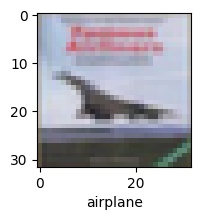

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

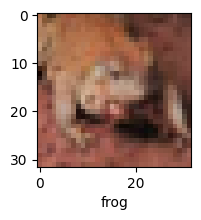

In [ ]:
plot_sample(X_test, y_test,5)

In [ ]:
classes[y_classes[5]]

'frog'